In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Final\laptop_price.csv', encoding='latin1')


In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# dataset


In [4]:
df.shape

(1303, 13)

# Primary data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### Data Preprocessing

In [6]:
df.isnull()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
#print("Feature names:\n", laptop_price['feature_names'])
ndf = df.drop(columns = ['laptop_ID'])
ndf.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [11]:
ndf['Ram'] = ndf['Ram'].str.replace('GB','').astype(int)

In [12]:
ndf

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Feature engineering

In [13]:
# Feature name: ScreenResolution

In [14]:
reso = ndf['ScreenResolution'].str.split('x', n=1, expand=True)

In [15]:
ndf['PrimaryWidth'] = reso[0]
ndf['height'] = reso[1]
ndf

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,PrimaryWidth,height
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,IPS Panel Full HD / Touchscreen 1920,1080
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768


In [16]:
ndf['PrimaryWidth'].str.split(' ', n=10, expand=True)

,0,1,2,3,4,5,6,7
0,IPS,Panel,Retina,Display,2560,None,None,None
1,1440,None,None,None,None,None,None,None
2,Full,HD,1920,None,None,None,None,None
3,IPS,Panel,Retina,Display,2880,None,None,None
4,IPS,Panel,Retina,Display,2560,None,None,None
...,...,...,...,...,...,...,...,...
1298,IPS,Panel,Full,HD,/,Touchscreen,1920,None
1299,IPS,Panel,Quad,HD+,/,Touchscreen,3200,None
1300,1366,None,None,None,None,None,None,None
1301,1366,None,None,None,None,None,None,None


In [17]:
#wid = ndf['PrimaryWidth'].str.split(' ', n=10, expand=True)

In [18]:
#ndf['width'] = wid[-1]
#ndf

In [19]:
ndf['width']= ndf['PrimaryWidth'].str.split(' ').str[-1]
ndf

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,PrimaryWidth,height,width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display 2560,1600,2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD 1920,1080,1920
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display 2880,1800,2880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display 2560,1600,2560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,IPS Panel Full HD / Touchscreen 1920,1080,1920
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,IPS Panel Quad HD+ / Touchscreen 3200,1800,3200
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,1366
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768,1366


# Data Visualization

In [20]:
#main data

#ndf.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\1181967799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ndf['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

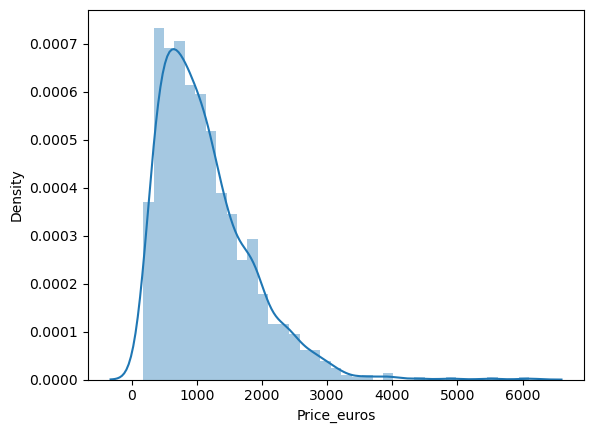

In [21]:
sns.distplot(ndf['Price_euros'])

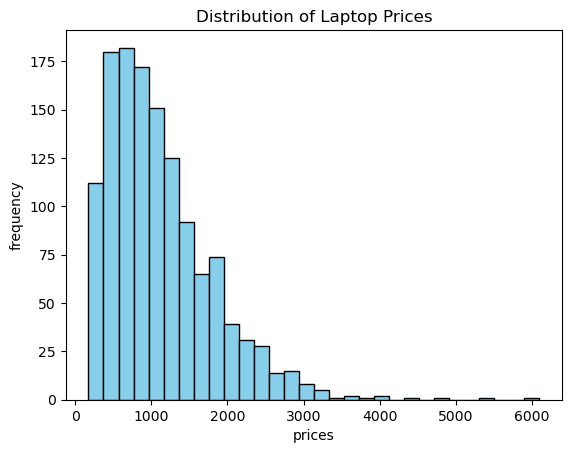

In [22]:
plt.hist(ndf['Price_euros'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('prices')
plt.ylabel('frequency')
plt.title('Distribution of Laptop Prices')

plt.show()


<BarContainer object of 1303 artists>

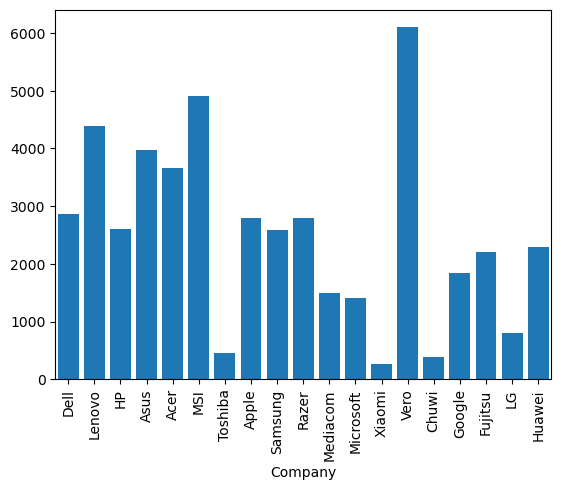

In [23]:
# these two graphs indicates how higher priced laptops
# bought in less quantity, and lower priced laptops are bought
# in more quantity.

ndf['Company'].value_counts().plot(kind = 'bar')

plt.bar(x=ndf['Company'], height = ndf['Price_euros'])

In [24]:
# Next visualization is about the Screen Resolution as a whole

In [25]:
ndf['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [26]:
# There are mainly two types of laptops repeating here
# Which are IPS Panel and Touchscreen display
# So prices will vary with these two

In [27]:
# Applying feature engineering again
# to visualize data more clearly about IPS and Touchscreen how they affect Prices
# instead of correalation we plot it in graph to perceive more visually

ndf['ScreenResolution'].apply(lambda x:'yes' if 'Touchscreen' in x else 'no')

0        no
1        no
2        no
3        no
4        no
       ... 
1298    yes
1299    yes
1300     no
1301     no
1302     no
Name: ScreenResolution, Length: 1303, dtype: object

In [28]:
ndf['Touchscreen'] = ndf['ScreenResolution'].apply(lambda x:'yes' if 'Touchscreen' in x else 'no')

In [29]:
ndf

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,PrimaryWidth,height,width,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display 2560,1600,2560,no
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1440,no
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD 1920,1080,1920,no
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display 2880,1800,2880,no
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display 2560,1600,2560,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,IPS Panel Full HD / Touchscreen 1920,1080,1920,yes
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,IPS Panel Quad HD+ / Touchscreen 3200,1800,3200,yes
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,1366,no
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768,1366,no


<Axes: xlabel='Touchscreen'>

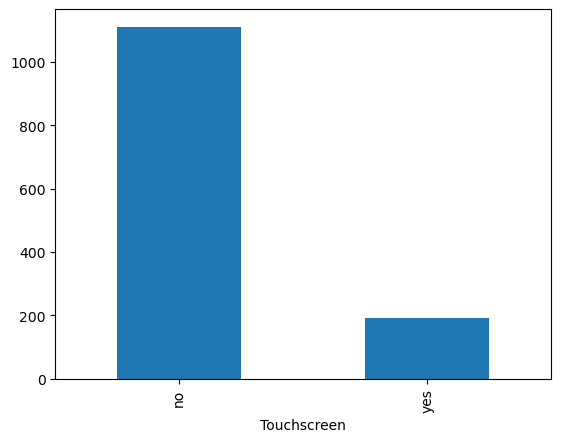

In [30]:
ndf['Touchscreen'].value_counts().plot(kind = 'bar')

Text(0, 0.5, 'Price')

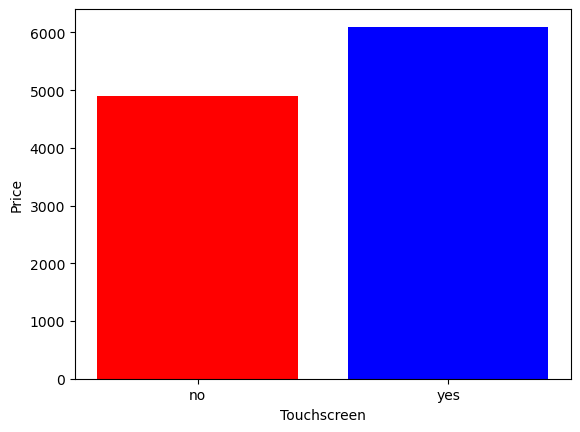

In [31]:
colors = ['blue' if touchscreen=='yes' else 'red' for touchscreen in ndf['Touchscreen']]


plt.bar(x=ndf['Touchscreen'], height = ndf['Price_euros'], color = colors)
plt.xlabel('Touchscreen')
plt.ylabel('Price')

### It can be visualized that touchsreen laptops take higher prices compared to other laptops that do not have touchscreen, so it definitely affect prices

In [32]:
ndf['IPS'] = ndf['ScreenResolution'].apply(lambda x:'yes' if 'IPS' in x else 'no')

In [33]:
ndf

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,PrimaryWidth,height,width,Touchscreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display 2560,1600,2560,no,yes
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1440,no,no
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD 1920,1080,1920,no,no
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display 2880,1800,2880,no,yes
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display 2560,1600,2560,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,IPS Panel Full HD / Touchscreen 1920,1080,1920,yes,yes
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,IPS Panel Quad HD+ / Touchscreen 3200,1800,3200,yes,yes
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,1366,no,no
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768,1366,no,no


<Axes: xlabel='IPS'>

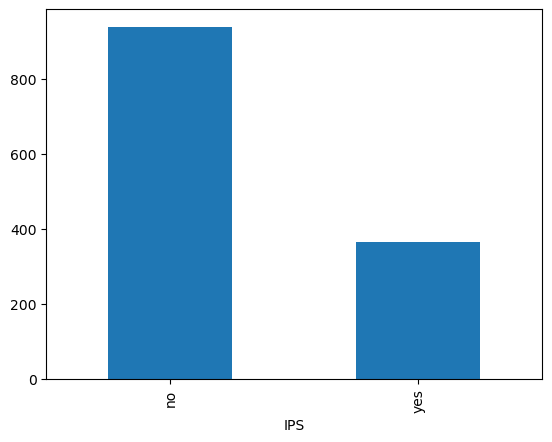

In [34]:
ndf['IPS'].value_counts().plot(kind = 'bar')

<Axes: xlabel='IPS', ylabel='Price_euros'>

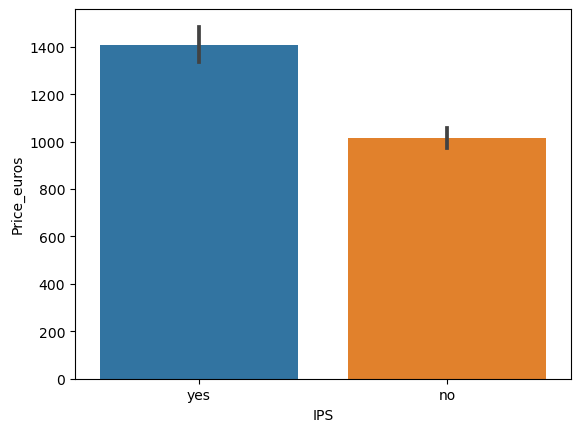

In [35]:
# colors = ['blue' if IPS=='no' else 'red' for IPS in ndf['IPS']]


# plt.bar(x=ndf['IPS'], height = ndf['Price_euros'], color = colors)
# plt.xlabel('IPS')
# plt.ylabel('Price')

sns.barplot(x=ndf['IPS'], y=ndf['Price_euros'])

### With IPS display, the prices are higher

In [36]:
ndf.drop(columns = ['ScreenResolution'], inplace = True)

In [37]:
ndf

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,PrimaryWidth,height,width,Touchscreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display 2560,1600,2560,no,yes
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1440,no,no
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD 1920,1080,1920,no,no
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display 2880,1800,2880,no,yes
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display 2560,1600,2560,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,IPS Panel Full HD / Touchscreen 1920,1080,1920,yes,yes
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,IPS Panel Quad HD+ / Touchscreen 3200,1800,3200,yes,yes
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,1366,no,no
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768,1366,no,no


In [38]:
ndf.drop(columns = ['Product'], inplace = True)

In [39]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,PrimaryWidth,height,width,Touchscreen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display 2560,1600,2560,no,yes
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1440,no,no
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD 1920,1080,1920,no,no
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display 2880,1800,2880,no,yes
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display 2560,1600,2560,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,IPS Panel Full HD / Touchscreen 1920,1080,1920,yes,yes
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,IPS Panel Quad HD+ / Touchscreen 3200,1800,3200,yes,yes
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,1366,no,no
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768,1366,no,no


In [40]:
ndf.drop(columns = ['PrimaryWidth'], inplace = True)

In [41]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1600,2560,no,yes
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,900,1440,no,no
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1080,1920,no,no
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,1800,2880,no,yes
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1600,2560,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1080,1920,yes,yes
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1800,3200,yes,yes
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,768,1366,no,no
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,768,1366,no,no


In [42]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   object 
 9   Price_euros  1303 non-null   float64
 10  height       1303 non-null   object 
 11  width        1303 non-null   object 
 12  Touchscreen  1303 non-null   object 
 13  IPS          1303 non-null   object 
dtypes: float64(2), int32(1), object(11)
memory usage: 137.6+ KB


In [43]:
#ndf.corr()
#We need non-numeric data to understand correlation

In [44]:
ndf['Weight'] = ndf['Weight'].str.replace('kg','').astype(float)

In [45]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,no,yes
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,no,no
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,no,no
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,no,yes
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,yes,yes
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,yes,yes
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,no,no
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,no,no


In [46]:
# ndf['Touchscreen'] = ndf['Touchscreen'].replace({'yes': 1})
# ndf['Touchscreen'] = ndf['Touchscreen'].replace({'no': 1})
# ndf['IPS'] = ndf['IPS'].replace({'yes': 1})
# ndf['IPS'] = ndf['IPS'].replace({'no': 1})
# ndf

In [47]:
#accidently made every yes/no 1 in touchscreen and Ips column

In [48]:
#to solve this we take main data column of screenResolution

In [49]:
ndf ['ScreenResolution'] = df['ScreenResolution']

In [50]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,ScreenResolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,no,yes,IPS Panel Retina Display 2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,no,no,1440x900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,no,no,Full HD 1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,no,yes,IPS Panel Retina Display 2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,no,yes,IPS Panel Retina Display 2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,yes,yes,IPS Panel Full HD / Touchscreen 1920x1080
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,yes,yes,IPS Panel Quad HD+ / Touchscreen 3200x1800
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,no,no,1366x768
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,no,no,1366x768


In [51]:
ndf.drop(columns = ['IPS'], inplace = True)
ndf.drop(columns = ['Touchscreen'], inplace = True)


In [52]:
ndf['Touchscreen'] = ndf['ScreenResolution'].apply(lambda x:'yes' if 'Touchscreen' in x else 'no')

In [53]:
ndf['IPS'] = ndf['ScreenResolution'].apply(lambda x:'yes' if 'IPS' in x else 'no')

In [54]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,ScreenResolution,Touchscreen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,IPS Panel Retina Display 2560x1600,no,yes
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,1440x900,no,no
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,Full HD 1920x1080,no,no
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,IPS Panel Retina Display 2880x1800,no,yes
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,IPS Panel Retina Display 2560x1600,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,IPS Panel Full HD / Touchscreen 1920x1080,yes,yes
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,IPS Panel Quad HD+ / Touchscreen 3200x1800,yes,yes
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,1366x768,no,no
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,1366x768,no,no


In [55]:
#solving this..
ndf['Touchscreen'] = ndf['Touchscreen'].replace({'yes': 1})
ndf['Touchscreen'] = ndf['Touchscreen'].replace({'no': 0})
ndf['IPS'] = ndf['IPS'].replace({'yes': 1})
ndf['IPS'] = ndf['IPS'].replace({'no': 0})
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,ScreenResolution,Touchscreen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,IPS Panel Retina Display 2560x1600,0,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,1440x900,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,Full HD 1920x1080,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,IPS Panel Retina Display 2880x1800,0,1
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,IPS Panel Retina Display 2560x1600,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,IPS Panel Full HD / Touchscreen 1920x1080,1,1
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,IPS Panel Quad HD+ / Touchscreen 3200x1800,1,1
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,1366x768,0,0
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,1366x768,0,0


In [56]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   Cpu               1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price_euros       1303 non-null   float64
 10  height            1303 non-null   object 
 11  width             1303 non-null   object 
 12  ScreenResolution  1303 non-null   object 
 13  Touchscreen       1303 non-null   int64  
 14  IPS               1303 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 147.7+ KB


In [57]:
ndf['height'] = ndf['height'].astype(int)
ndf['width'] = ndf['width'].astype(int)


In [58]:
ndf.drop(columns = ['ScreenResolution'], inplace = True)


In [59]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0


# Correlation Overview

In [60]:
values = ndf.select_dtypes(include=['float', 'int'])
values.corr()


,Inches,Ram,Weight,Price_euros,height,width,Touchscreen,IPS
Inches,1.000000,0.237993,0.827631,0.068197,-0.095404,-0.071245,-0.361735,-0.114804
Ram,0.237993,1.000000,0.383874,0.743007,0.424437,0.433121,0.116984,0.206623
Weight,0.827631,0.383874,1.000000,0.210370,-0.053846,-0.032880,-0.294620,0.016967
Price_euros,0.068197,0.743007,0.210370,1.000000,0.552809,0.556529,0.191226,0.252208
height,-0.095404,0.424437,-0.053846,0.552809,1.000000,0.994219,0.357930,0.289030
width,-0.071245,0.433121,-0.032880,0.556529,0.994219,1.000000,0.351066,0.281457
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,0.357930,0.351066,1.000000,0.150512
IPS,-0.114804,0.206623,0.016967,0.252208,0.289030,0.281457,0.150512,1.000000


In [61]:
values.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
height         0.552809
width          0.556529
Touchscreen    0.191226
IPS            0.252208
Name: Price_euros, dtype: float64

#### We can see here how these columns affect the price with correlation

In [62]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [63]:

ndf['Cpu'].apply(lambda x:x.split()[0:3])

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu, Length: 1303, dtype: object

In [64]:
ndf['PrimaryProcessor'] = ndf['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [65]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,PrimaryProcessor
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7


In [66]:
def processor(name):
    if name == 'Intel Core i3' or name == 'Intel Core i5' or name == 'Intel Core i7'or name == 'Intel Celeron Dual':
        return name
    else:

        val = name.split(" ")
        if val[0] == 'Intel':
            return 'Intel Processors'

        elif val[0] == 'AMD':
            return 'AMD Processors'

In [67]:
ndf['Processor'] = ndf['PrimaryProcessor'].apply(processor)

In [68]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,PrimaryProcessor,Processor
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,Intel Celeron Dual
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,Intel Core i7


In [69]:
ndf.drop(columns = ['PrimaryProcessor'], inplace = True)

In [70]:
#ndf.drop(columns = ['Cpu'], inplace = True)

<Axes: xlabel='Processor'>

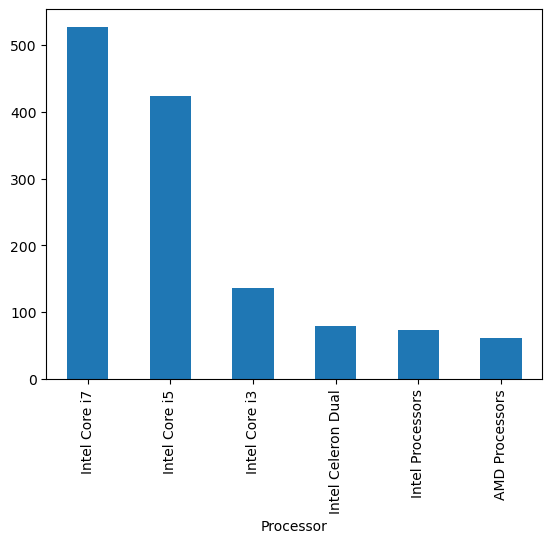

In [71]:
# Now if we plot this in a graph we can visualize how processor is essential in this dataframe
ndf['Processor'].value_counts().plot(kind = 'bar')

In [72]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7


In [73]:
#sns.barplot(x=ndf['Processor'], y =ndf['Price_euros'])

In [74]:
# plt.bar(x = ndf['Processor'], height = ndf['Price_euros'])
# plt.xlabel('Processor')
# plt.ylabel('Price')

# plt.xticks(rotation=45, ha='right')

# plt.show()


### There are some missing values in Processor column, we need to delete those

In [75]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float64
 9   Price_euros  1303 non-null   float64
 10  height       1303 non-null   int32  
 11  width        1303 non-null   int32  
 12  Touchscreen  1303 non-null   int64  
 13  IPS          1303 non-null   int64  
 14  Processor    1302 non-null   object 
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [76]:
ndf = ndf.dropna(subset = ['Processor'])

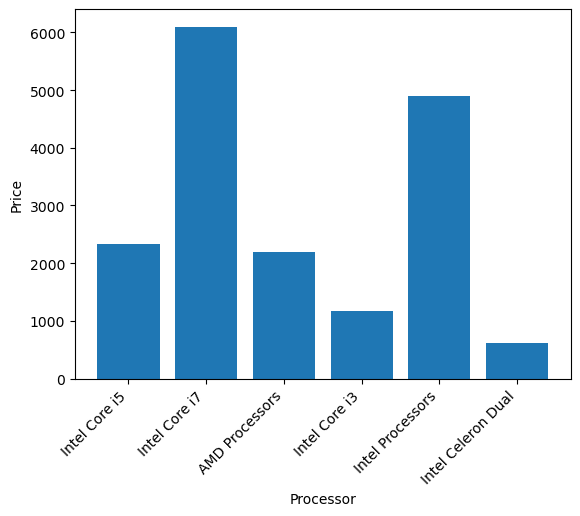

In [77]:
plt.bar(x = ndf['Processor'], height = ndf['Price_euros'])
plt.xlabel('Processor')
plt.ylabel('Price')

plt.xticks(rotation=45, ha='right')

plt.show()


## So Processors affect the prices greatly

In [78]:
# Now working with Ram

<Axes: xlabel='Ram'>

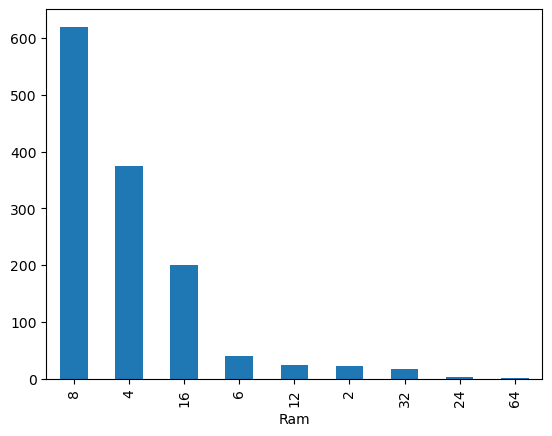

In [79]:
ndf['Ram'].value_counts().plot(kind = 'bar')

#  8gb ram is mosty used in the datasheet, which is true for marketplace as well.

<Axes: xlabel='Ram', ylabel='Price_euros'>

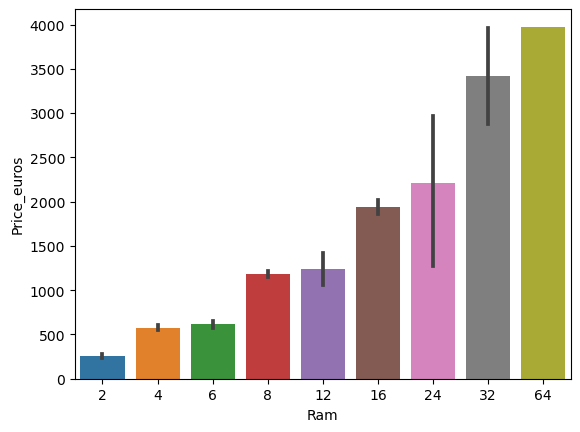

In [80]:
sns.barplot(x = ndf['Ram'], y = ndf['Price_euros'])


### this relationship illustrates linearity, as the Ram value increases, prices value increases as well

In [81]:
ndf['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [82]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7


In [83]:
#ndf.drop(columns = ['SSD', 'HDD'], inplace = True)

In [84]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7


# Storage Data Manipulation

In [85]:

ndf['Memory'] = ndf['Memory'].str.replace('TB', '000')
ndf['Memory'] = ndf['Memory'].str.replace('GB', '')
ndf

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\231585508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Memory'] = ndf['Memory'].str.replace('TB', '000')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\231585508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Memory'] = ndf['Memory'].str.replace('GB', '')


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7


In [86]:
ndf['Memory'].value_counts()

Memory
256 SSD                         412
1000 HDD                        223
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 37
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1.0000 Hybrid                     9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD   

# Data Manipulation testing

In [87]:
# import re

# val = '1.0 GB'
# val = re.sub(r'\.0', '', val)
# print(val)


In [88]:
#df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
#df['Memory'] = df['Memory'].astype(str).replace('\.0000', '', regex=True)


In [89]:
ndf['Memory'].value_counts()

Memory
256 SSD                         412
1000 HDD                        223
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 37
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1.0000 Hybrid                     9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD   

In [90]:
# it seems we should have removed .0 expression first

In [91]:
# So loading the Memory column from original data frame

In [92]:
ndf.drop(columns = ['Memory'], inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\4035004180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(columns = ['Memory'], inplace = True)


In [93]:
ndf['Memory'] = df['Memory']

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\453078667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Memory'] = df['Memory']


In [94]:
ndf['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [95]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [96]:
ndf['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [97]:
ndf['Memory'] = ndf['Memory'].str.replace('TB', '000')
ndf['Memory'] = ndf['Memory'].str.replace('GB', '')
ndf['Memory'].value_counts()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\1564613904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Memory'] = ndf['Memory'].str.replace('TB', '000')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\1564613904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Memory'] = ndf['Memory'].str.replace('GB', '')


Memory
256 SSD                         412
1000 HDD                        223
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 37
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1.0000 Hybrid                     9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD   

In [98]:
div = ndf['Memory'].str.split('+', n =1, expand = True)
print(div)

                      0     1
0               128 SSD  None
1     128 Flash Storage  None
2               256 SSD  None
3               512 SSD  None
4               256 SSD  None
...                 ...   ...
1298            128 SSD  None
1299            512 SSD  None
1300   64 Flash Storage  None
1301           1000 HDD  None
1302            500 HDD  None

[1302 rows x 2 columns]


In [99]:
left = div[0]
right = div[1]


In [100]:
print(left)
print(right)

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: 0, Length: 1302, dtype: object
0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: 1, Length: 1302, dtype: object


In [101]:
#left.split(maxsplit = 1)

ndf['left'] = left
ndf['right'] = right
ndf.sample(7)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\558151310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['left'] = left
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\558151310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['right'] = right


,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,Memory,left,right
211,Asus,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1050,Windows 10,2.90,1407.0,1080,1920,0,0,Intel Core i7,256 SSD + 1000 HDD,256 SSD,1000 HDD
1087,Lenovo,Notebook,14.0,Intel Core i5 6200U 2.3GHz,8,Intel HD Graphics 520,Windows 7,1.70,1199.0,1080,1920,0,0,Intel Core i5,180 SSD,180 SSD,None
742,Toshiba,Notebook,14.0,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,1.25,1535.0,1080,1920,1,1,Intel Core i5,256 SSD,256 SSD,None
588,Lenovo,Notebook,15.6,Intel Core i7 8550U 1.8GHz,12,Intel HD Graphics 620,Windows 10,2.20,609.0,768,1366,1,0,Intel Core i7,1000 HDD,1000 HDD,None
449,Microsoft,Ultrabook,13.5,Intel Core i7 7660U 2.5GHz,16,Intel Iris Plus Graphics 640,Windows 10 S,1.25,2589.0,1504,2256,1,0,Intel Core i7,512 SSD,512 SSD,None
613,Dell,Notebook,15.6,Intel Core i3 6006U 2.0GHz,4,Intel HD Graphics 520,Linux,2.25,359.0,768,1366,0,0,Intel Core i3,1000 HDD,1000 HDD,None
412,HP,Notebook,15.6,Intel Core i3 6006U 2GHz,4,AMD Radeon 520,Windows 10,2.10,469.0,1080,1920,0,0,Intel Core i3,1000 HDD,1000 HDD,None


In [102]:
ndf['left'].str.split(n=1, expand = True)

,0,1
0,128,SSD
1,128,Flash Storage
2,256,SSD
3,512,SSD
4,256,SSD
...,...,...
1298,128,SSD
1299,512,SSD
1300,64,Flash Storage
1301,1000,HDD


In [103]:
#ndf['SSD'] = ndf['left'].str.split().apply(lambda x: int(x[0]) if 'SSD' in x else 0)


In [104]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Inches       1302 non-null   float64
 3   Cpu          1302 non-null   object 
 4   Ram          1302 non-null   int32  
 5   Gpu          1302 non-null   object 
 6   OpSys        1302 non-null   object 
 7   Weight       1302 non-null   float64
 8   Price_euros  1302 non-null   float64
 9   height       1302 non-null   int32  
 10  width        1302 non-null   int32  
 11  Touchscreen  1302 non-null   int64  
 12  IPS          1302 non-null   int64  
 13  Processor    1302 non-null   object 
 14  Memory       1302 non-null   object 
 15  left         1302 non-null   object 
 16  right        208 non-null    object 
dtypes: float64(3), int32(3), int64(2), object(9)
memory usage: 167.8+ KB


In [105]:
# ndf['SSD'] = 0

# ndf['SSD'] += ndf['left'].str.split().apply(lambda x: int(x[0]) if 'SSD' in x else 0)
# ndf['SSD'] += ndf['right'].str.split().apply(lambda x: int(x[0]) if 'SSD' in x else 0)

# ndf

In [106]:
ndf['SSD'] = 0

ndf['SSD'] += ndf['left'].str.split().apply(lambda x: int(x[0]) if x and ('SSD' in x) and (x[0].isdigit()) else 0)
ndf['SSD'] += ndf['right'].str.split().apply(lambda x: int(x[0]) if x and ('SSD' in x) and (x[0].isdigit()) else 0)

ndf

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3656858346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['SSD'] = 0
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3656858346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['SSD'] += ndf['left'].str.split().apply(lambda x: int(x[0]) if x and ('SSD' in x) and (x[0].isdigit()) else 0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3656858346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,Memory,left,right,SSD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,128 SSD,128 SSD,None,128
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,128 Flash Storage,128 Flash Storage,None,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256 SSD,256 SSD,None,256
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,512 SSD,512 SSD,None,512
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,256 SSD,256 SSD,None,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,128 SSD,128 SSD,None,128
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,512 SSD,512 SSD,None,512
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,64 Flash Storage,64 Flash Storage,None,0
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,1000 HDD,1000 HDD,None,0


In [107]:
ndf.sample(20)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,Memory,left,right,SSD
594,Lenovo,Notebook,17.3,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 520,No OS,2.80,529.00,1080,1920,0,0,Intel Core i3,500 HDD,500 HDD,None,0
1059,MSI,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,16,Nvidia GeForce GTX 1060,Windows 10,2.94,1819.00,1080,1920,0,0,Intel Core i7,256 SSD + 1000 HDD,256 SSD,1000 HDD,256
122,Lenovo,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Nvidia GeForce 940MX,No OS,2.20,629.00,1080,1920,0,0,Intel Core i5,256 SSD,256 SSD,None,256
9,Acer,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.60,770.00,1080,1920,0,1,Intel Core i5,256 SSD,256 SSD,None,256
456,Dell,Notebook,17.3,Intel Core i7 7700HQ 2.7GHz,8,Nvidia GeForce GTX 1060,Windows 10,4.42,2046.00,1080,1920,0,1,Intel Core i7,1000 HDD,1000 HDD,None,0
230,Asus,Notebook,15.6,Intel Core i3 7100U 2.4GHz,4,Intel HD Graphics 620,Windows 10,2.37,398.99,768,1366,0,0,Intel Core i3,1000 HDD,1000 HDD,None,0
1160,Lenovo,Ultrabook,14.0,Intel Core i7 6600U 2.6GHz,8,Intel HD Graphics 520,Windows 7,1.70,1499.00,1080,1920,0,0,Intel Core i7,256 SSD,256 SSD,None,256
1282,HP,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,2,Intel HD Graphics 400,Windows 10,1.17,209.00,768,1366,0,0,Intel Celeron Dual,32 Flash Storage,32 Flash Storage,None,0
389,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 7500U 2.7GHz,16,Intel HD Graphics 620,Windows 10,1.42,2509.00,1440,2560,1,0,Intel Core i7,512 SSD,512 SSD,None,512
679,Acer,Gaming,15.6,Intel Core i5 7300HQ 2.5GHz,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,1299.00,1080,1920,0,0,Intel Core i5,256 SSD,256 SSD,None,256


In [108]:
ndf['HDD'] = 0

ndf['HDD'] += ndf['left'].str.split().apply(lambda x: int(x[0]) if x and ('HDD' in x) and (x[0].isdigit()) else 0)
ndf['HDD'] += ndf['right'].str.split().apply(lambda x: int(x[0]) if x and ('HDD' in x) and (x[0].isdigit()) else 0)

ndf

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\677849572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['HDD'] = 0
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\677849572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['HDD'] += ndf['left'].str.split().apply(lambda x: int(x[0]) if x and ('HDD' in x) and (x[0].isdigit()) else 0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\677849572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,Memory,left,right,SSD,HDD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,128 SSD,128 SSD,None,128,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,128 Flash Storage,128 Flash Storage,None,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256 SSD,256 SSD,None,256,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,512 SSD,512 SSD,None,512,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,256 SSD,256 SSD,None,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,128 SSD,128 SSD,None,128,0
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,512 SSD,512 SSD,None,512,0
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,64 Flash Storage,64 Flash Storage,None,0,0
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,1000 HDD,1000 HDD,None,0,1000


In [109]:
ndf['Hybrid'] = 0

ndf['Hybrid'] += ndf['left'].str.split().apply(lambda x: int(x[0]) if x and ('Hybrid' in x) and (x[0].isdigit()) else 0)
ndf['Hybrid'] += ndf['right'].str.split().apply(lambda x: int(x[0]) if x and ('Hybrid' in x) and (x[0].isdigit()) else 0)

ndf

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3640073217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Hybrid'] = 0
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3640073217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Hybrid'] += ndf['left'].str.split().apply(lambda x: int(x[0]) if x and ('Hybrid' in x) and (x[0].isdigit()) else 0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3640073217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,Memory,left,right,SSD,HDD,Hybrid
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,128 SSD,128 SSD,None,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,128 Flash Storage,128 Flash Storage,None,0,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256 SSD,256 SSD,None,256,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,512 SSD,512 SSD,None,512,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,256 SSD,256 SSD,None,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,128 SSD,128 SSD,None,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,512 SSD,512 SSD,None,512,0,0
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,64 Flash Storage,64 Flash Storage,None,0,0,0
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,1000 HDD,1000 HDD,None,0,1000,0


In [110]:
ndf['FlashStorage'] = 0

ndf['FlashStorage'] += ndf['left'].str.split().apply(lambda x: int(x[0]) if x and ('Flash' in x) and (x[0].isdigit()) else 0)
ndf['FlashStorage'] += ndf['right'].str.split().apply(lambda x: int(x[0]) if x and ('Flash' in x) and (x[0].isdigit()) else 0)

ndf

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3734091244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['FlashStorage'] = 0
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3734091244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['FlashStorage'] += ndf['left'].str.split().apply(lambda x: int(x[0]) if x and ('Flash' in x) and (x[0].isdigit()) else 0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3734091244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,...,Touchscreen,IPS,Processor,Memory,left,right,SSD,HDD,Hybrid,FlashStorage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,...,0,1,Intel Core i5,128 SSD,128 SSD,None,128,0,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,...,0,0,Intel Core i5,128 Flash Storage,128 Flash Storage,None,0,0,0,128
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,...,0,0,Intel Core i5,256 SSD,256 SSD,None,256,0,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,...,0,1,Intel Core i7,512 SSD,512 SSD,None,512,0,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,...,0,1,Intel Core i5,256 SSD,256 SSD,None,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,...,1,1,Intel Core i7,128 SSD,128 SSD,None,128,0,0,0
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,...,1,1,Intel Core i7,512 SSD,512 SSD,None,512,0,0,0
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,768,...,0,0,Intel Celeron Dual,64 Flash Storage,64 Flash Storage,None,0,0,0,64
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,...,0,0,Intel Core i7,1000 HDD,1000 HDD,None,0,1000,0,0


In [111]:
ndf.drop(columns=['Memory', 'left', 'right'], inplace = True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\395571118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(columns=['Memory', 'left', 'right'], inplace = True)


In [112]:
#ndf.corr()['Price']

In [113]:
values = ndf.select_dtypes(include=['float', 'int'])
values.corr()['Price_euros']

Inches          0.067329
Ram             0.742905
Weight          0.209867
Price_euros     1.000000
height          0.554591
width           0.557369
Touchscreen     0.192917
IPS             0.253320
SSD             0.670660
HDD            -0.095924
Hybrid         -0.004841
FlashStorage   -0.040067
Name: Price_euros, dtype: float64

### From this, hybrid is not needed as the correlation is giving very small percentage which can be ignored for getting better result

In [114]:
ndf.drop(columns=['Hybrid'], inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\2478768256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(columns=['Hybrid'], inplace = True)


In [115]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,0,0,128
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,512,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,512,0,0
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,0,0,64
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,0,1000,0


### Now working with GPU data

In [116]:
ndf['Graphics'] = ndf['Gpu'].apply(lambda x:x.split()[0])
ndf

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\876126990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Graphics'] = ndf['Gpu'].apply(lambda x:x.split()[0])


,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,128,0,0,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,0,0,128,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256,0,0,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,512,0,0,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,512,0,0,Intel
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,0,0,64,Intel
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,0,1000,0,AMD


In [117]:
ndf['Graphics'].value_counts()

Graphics
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<BarContainer object of 1302 artists>

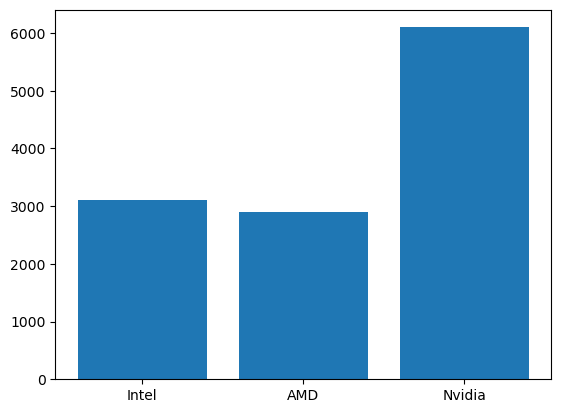

In [118]:
plt.bar(x = ndf['Graphics'], height = ndf['Price_euros'])

<Axes: xlabel='Graphics', ylabel='Price_euros'>

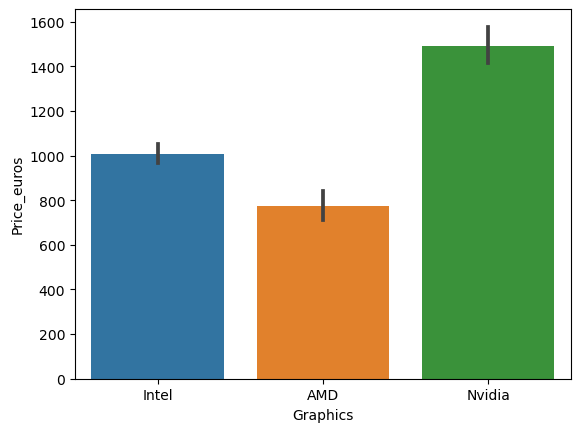

In [119]:
sns.barplot(x = ndf['Graphics'], y = ndf['Price_euros'])

#### This is true as most devices use NVIDIA Graphics and it affects the prices

In [120]:
ndf.drop(columns = ['Graphics'], inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3709177782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(columns = ['Graphics'], inplace = True)


In [121]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,0,0,128
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,512,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,512,0,0
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,0,0,64
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,0,1000,0


### Accidently removed Graphics column instead of GPU column.
## Fixing this again

In [122]:
ndf['Graphics'] = ndf['Gpu'].apply(lambda x:x.split()[0])


C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\1549540637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Graphics'] = ndf['Gpu'].apply(lambda x:x.split()[0])


In [123]:
ndf

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,128,0,0,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,0,0,128,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256,0,0,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,512,0,0,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,512,0,0,Intel
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,0,0,64,Intel
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,0,1000,0,AMD


In [124]:
ndf.drop(columns = ['Gpu'], inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\1995418764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(columns = ['Gpu'], inplace = True)


In [125]:
ndf

,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,128,0,0,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,0,0,128,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256,0,0,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,512,0,0,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,512,0,0,Intel
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,0,0,64,Intel
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,0,1000,0,AMD


In [126]:
ndf['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

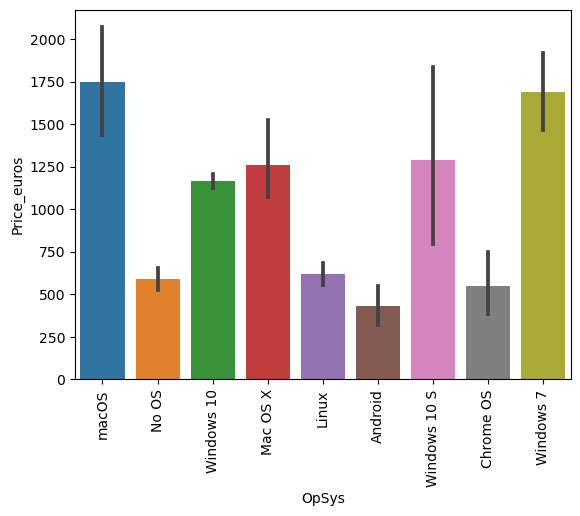

In [127]:
sns.barplot(x = ndf['OpSys'], y = ndf['Price_euros'])
plt.xticks(rotation='vertical')

### It's not necessary to maniplate data for Operating system, however, from the graph, Windows 10 and 7 is showing differences in price.

### But Windows version shouldn't affect price. Same as Mac OS

In [128]:
# ndf['System'] = ndf['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else x)
# ndf['System'] = ndf['OpSys'].apply(lambda x: 'Mac' if 'mac' in x else x)
# ndf['System'] = ndf['OpSys'].apply(lambda x: 'Mac' if 'Mac' in x else x)

ndf['System'] = ndf['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else ('Mac' if 'Mac' in x or 'mac' in x else x))


ndf

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3271124705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['System'] = ndf['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else ('Mac' if 'Mac' in x or 'mac' in x else x))


,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics,System
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,macOS,1.37,1339.69,1600,2560,0,1,Intel Core i5,128,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,macOS,1.34,898.94,900,1440,0,0,Intel Core i5,0,0,128,Intel,Mac
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256,0,0,Intel,No OS
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,macOS,1.83,2537.45,1800,2880,0,1,Intel Core i7,512,0,0,AMD,Mac
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,macOS,1.37,1803.60,1600,2560,0,1,Intel Core i5,256,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Windows 10,1.80,638.00,1080,1920,1,1,Intel Core i7,128,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Windows 10,1.30,1499.00,1800,3200,1,1,Intel Core i7,512,0,0,Intel,Windows
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Windows 10,1.50,229.00,768,1366,0,0,Intel Celeron Dual,0,0,64,Intel,Windows
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,Windows 10,2.19,764.00,768,1366,0,0,Intel Core i7,0,1000,0,AMD,Windows


In [129]:
ndf['OpSys'] = ndf['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else ('Mac' if 'Mac' in x or 'mac' in x else x))

ndf

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\2931725114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['OpSys'] = ndf['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else ('Mac' if 'Mac' in x or 'mac' in x else x))


,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics,System
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Mac,1.37,1339.69,1600,2560,0,1,Intel Core i5,128,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Mac,1.34,898.94,900,1440,0,0,Intel Core i5,0,0,128,Intel,Mac
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256,0,0,Intel,No OS
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,Mac,1.83,2537.45,1800,2880,0,1,Intel Core i7,512,0,0,AMD,Mac
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Mac,1.37,1803.60,1600,2560,0,1,Intel Core i5,256,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Windows,1.80,638.00,1080,1920,1,1,Intel Core i7,128,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Windows,1.30,1499.00,1800,3200,1,1,Intel Core i7,512,0,0,Intel,Windows
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Windows,1.50,229.00,768,1366,0,0,Intel Celeron Dual,0,0,64,Intel,Windows
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,Windows,2.19,764.00,768,1366,0,0,Intel Core i7,0,1000,0,AMD,Windows


In [130]:
ndf.drop(columns =['System'], inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\2872522905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(columns =['System'], inplace = True)


In [131]:
ndf

,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Mac,1.37,1339.69,1600,2560,0,1,Intel Core i5,128,0,0,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Mac,1.34,898.94,900,1440,0,0,Intel Core i5,0,0,128,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256,0,0,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,Mac,1.83,2537.45,1800,2880,0,1,Intel Core i7,512,0,0,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Mac,1.37,1803.60,1600,2560,0,1,Intel Core i5,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Windows,1.80,638.00,1080,1920,1,1,Intel Core i7,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Windows,1.30,1499.00,1800,3200,1,1,Intel Core i7,512,0,0,Intel
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Windows,1.50,229.00,768,1366,0,0,Intel Celeron Dual,0,0,64,Intel
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,Windows,2.19,764.00,768,1366,0,0,Intel Core i7,0,1000,0,AMD


<Axes: xlabel='OpSys', ylabel='Price_euros'>

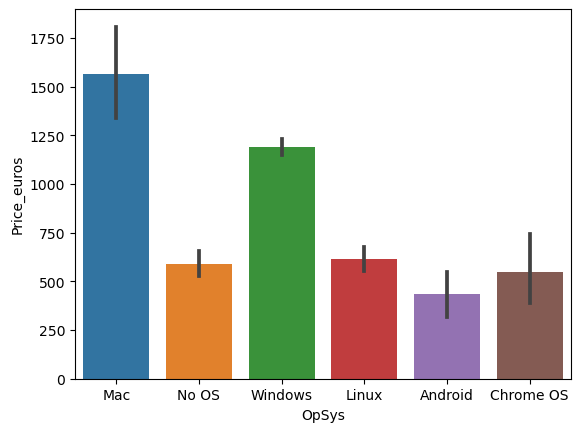

In [132]:
sns.barplot(x = ndf['OpSys'], y = ndf['Price_euros'])

### As always, Mac prices are higher.


In [133]:
ndf['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64

<Axes: xlabel='TypeName'>

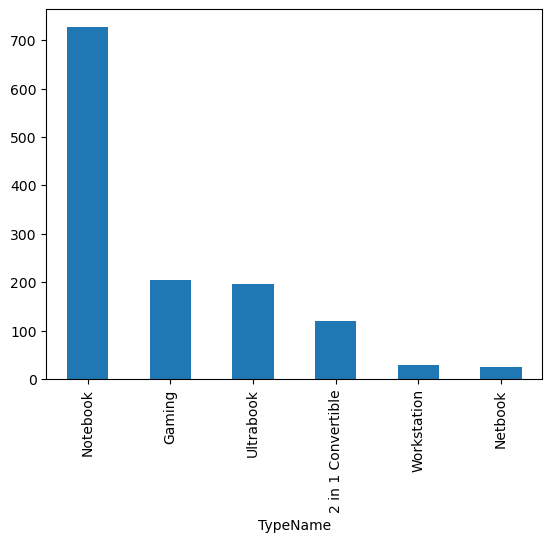

In [134]:
ndf['TypeName'].value_counts().plot(kind = 'bar')

### Mostly Notebooks are sold

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

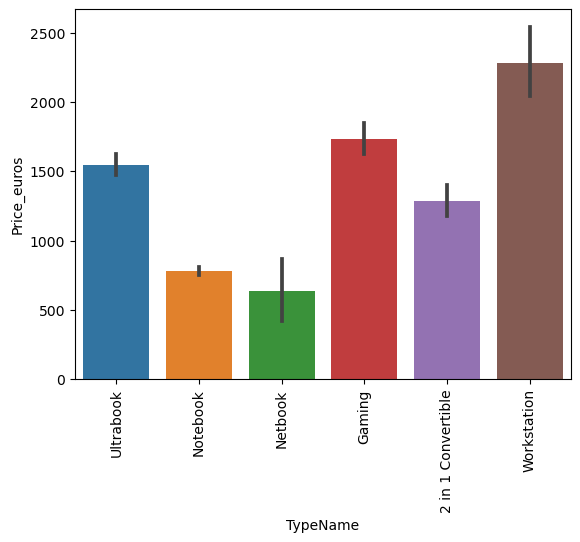

In [135]:
sns.barplot(x = ndf['TypeName'], y = ndf['Price_euros'])
plt.xticks(rotation='vertical')

### Workstation Laptops take higher prices

<Axes: xlabel='Weight', ylabel='Price_euros'>

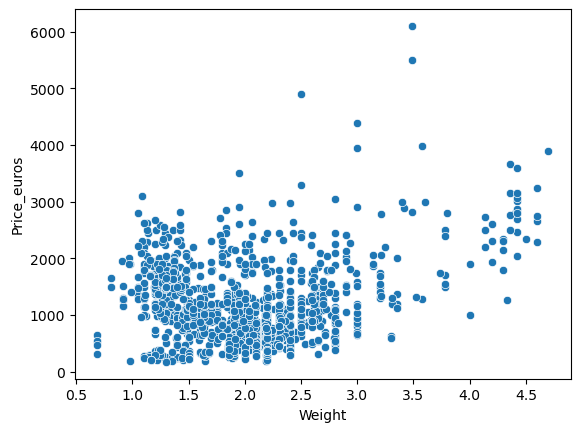

In [136]:
sns.scatterplot(x = ndf['Weight'], y = ndf['Price_euros'])

### For 2.5 to 3 kg price does not change that much, but after this, the price go high a bit

# Final Correlation

In [137]:
# As these are the engineered data we will work with

In [138]:
values = ndf.select_dtypes(include=['float', 'int'])
values.corr()
values.corr()['Price_euros']

Inches          0.067329
Ram             0.742905
Weight          0.209867
Price_euros     1.000000
height          0.554591
width           0.557369
Touchscreen     0.192917
IPS             0.253320
SSD             0.670660
HDD            -0.095924
FlashStorage   -0.040067
Name: Price_euros, dtype: float64

# Heat Map

<Axes: >

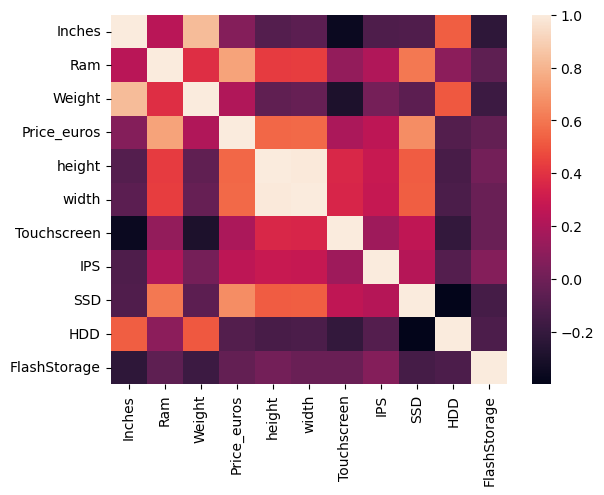

In [139]:
sns.heatmap(values.corr())

## We can see that Ram, SSD greately affects the prices. Similary height and weight also affects it comparatively more.

In [140]:
ndf['DisplayArea'] = ndf['height'] * ndf['width']
ndf
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1302 non-null   object 
 1   TypeName      1302 non-null   object 
 2   Inches        1302 non-null   float64
 3   Cpu           1302 non-null   object 
 4   Ram           1302 non-null   int32  
 5   OpSys         1302 non-null   object 
 6   Weight        1302 non-null   float64
 7   Price_euros   1302 non-null   float64
 8   height        1302 non-null   int32  
 9   width         1302 non-null   int32  
 10  Touchscreen   1302 non-null   int64  
 11  IPS           1302 non-null   int64  
 12  Processor     1302 non-null   object 
 13  SSD           1302 non-null   int64  
 14  HDD           1302 non-null   int64  
 15  FlashStorage  1302 non-null   int64  
 16  Graphics      1302 non-null   object 
 17  DisplayArea   1302 non-null   int32  
dtypes: float64(3), int32(4), int64(5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3223119349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['DisplayArea'] = ndf['height'] * ndf['width']


In [141]:
ndf

,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight,Price_euros,height,width,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics,DisplayArea
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Mac,1.37,1339.69,1600,2560,0,1,Intel Core i5,128,0,0,Intel,4096000
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Mac,1.34,898.94,900,1440,0,0,Intel Core i5,0,0,128,Intel,1296000
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,575.00,1080,1920,0,0,Intel Core i5,256,0,0,Intel,2073600
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,Mac,1.83,2537.45,1800,2880,0,1,Intel Core i7,512,0,0,AMD,5184000
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Mac,1.37,1803.60,1600,2560,0,1,Intel Core i5,256,0,0,Intel,4096000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Windows,1.80,638.00,1080,1920,1,1,Intel Core i7,128,0,0,Intel,2073600
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Windows,1.30,1499.00,1800,3200,1,1,Intel Core i7,512,0,0,Intel,5760000
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Windows,1.50,229.00,768,1366,0,0,Intel Celeron Dual,0,0,64,Intel,1049088
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,Windows,2.19,764.00,768,1366,0,0,Intel Core i7,0,1000,0,AMD,1049088


In [142]:
values = ndf.select_dtypes(include=['float', 'int'])
values.corr()
values.corr()['Price_euros']

Inches          0.067329
Ram             0.742905
Weight          0.209867
Price_euros     1.000000
height          0.554591
width           0.557369
Touchscreen     0.192917
IPS             0.253320
SSD             0.670660
HDD            -0.095924
FlashStorage   -0.040067
DisplayArea     0.516474
Name: Price_euros, dtype: float64

### From the heatmap and correlation it is better to use DisplayArea instead of height and width

In [143]:
ndf.drop(columns =['Cpu','height', 'width'], inplace = True)
ndf

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\1809546424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(columns =['Cpu','height', 'width'], inplace = True)


,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics,DisplayArea
0,Apple,Ultrabook,13.3,8,Mac,1.37,1339.69,0,1,Intel Core i5,128,0,0,Intel,4096000
1,Apple,Ultrabook,13.3,8,Mac,1.34,898.94,0,0,Intel Core i5,0,0,128,Intel,1296000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,0,0,Intel Core i5,256,0,0,Intel,2073600
3,Apple,Ultrabook,15.4,16,Mac,1.83,2537.45,0,1,Intel Core i7,512,0,0,AMD,5184000
4,Apple,Ultrabook,13.3,8,Mac,1.37,1803.60,0,1,Intel Core i5,256,0,0,Intel,4096000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,638.00,1,1,Intel Core i7,128,0,0,Intel,2073600
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,1499.00,1,1,Intel Core i7,512,0,0,Intel,5760000
1300,Lenovo,Notebook,14.0,2,Windows,1.50,229.00,0,0,Intel Celeron Dual,0,0,64,Intel,1049088
1301,HP,Notebook,15.6,6,Windows,2.19,764.00,0,0,Intel Core i7,0,1000,0,AMD,1049088


In [144]:
#Final Correlation

values = ndf.select_dtypes(include=['float', 'int'])
values.corr()
values.corr()['Price_euros']

Inches          0.067329
Ram             0.742905
Weight          0.209867
Price_euros     1.000000
Touchscreen     0.192917
IPS             0.253320
SSD             0.670660
HDD            -0.095924
FlashStorage   -0.040067
DisplayArea     0.516474
Name: Price_euros, dtype: float64

# Final Heat Map

<Axes: >

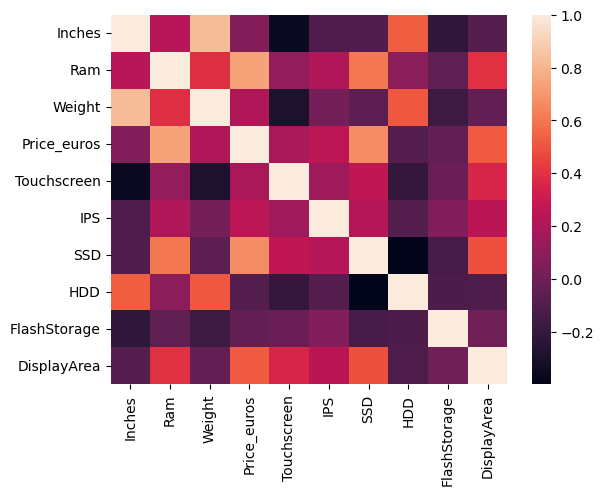

In [145]:
sns.heatmap(values.corr())

# Log Transformation

### log transfromation is needed as our data is skewed as shown in 'Data Visualization'

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3441929913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ndf['Price_euros'] )


<Axes: xlabel='Price_euros', ylabel='Density'>

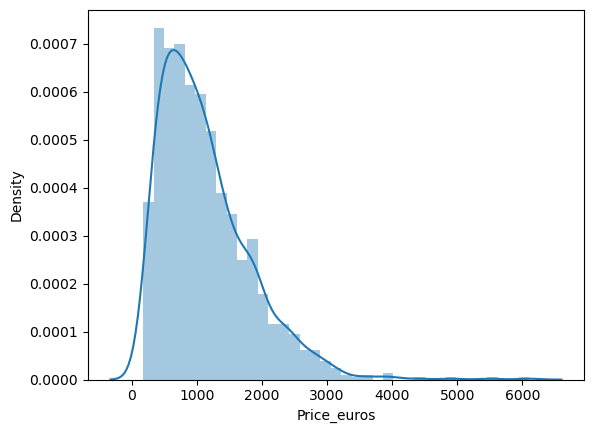

In [146]:
 sns.distplot(ndf['Price_euros'] )

C:\Users\Dell\AppData\Local\Temp\ipykernel_8580\3315783516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price_euros']))


<Axes: xlabel='Price_euros', ylabel='Density'>

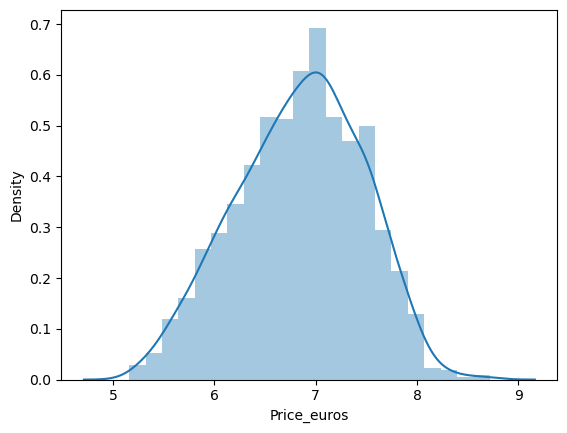

In [147]:
 sns.distplot(np.log(df['Price_euros']))

In [148]:
chart = ndf.drop(columns=['Price_euros'])

In [149]:
chart

,Company,TypeName,Inches,Ram,OpSys,Weight,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics,DisplayArea
0,Apple,Ultrabook,13.3,8,Mac,1.37,0,1,Intel Core i5,128,0,0,Intel,4096000
1,Apple,Ultrabook,13.3,8,Mac,1.34,0,0,Intel Core i5,0,0,128,Intel,1296000
2,HP,Notebook,15.6,8,No OS,1.86,0,0,Intel Core i5,256,0,0,Intel,2073600
3,Apple,Ultrabook,15.4,16,Mac,1.83,0,1,Intel Core i7,512,0,0,AMD,5184000
4,Apple,Ultrabook,13.3,8,Mac,1.37,0,1,Intel Core i5,256,0,0,Intel,4096000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,1,1,Intel Core i7,128,0,0,Intel,2073600
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,1,1,Intel Core i7,512,0,0,Intel,5760000
1300,Lenovo,Notebook,14.0,2,Windows,1.50,0,0,Intel Celeron Dual,0,0,64,Intel,1049088
1301,HP,Notebook,15.6,6,Windows,2.19,0,0,Intel Core i7,0,1000,0,AMD,1049088


In [150]:
price = np.log(ndf['Price_euros'])

In [151]:
price

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1302, dtype: float64

# Train Test Split

In [152]:
X = ndf.drop(columns = ['Price_euros'])
y = np.log(ndf['Price_euros'])

In [153]:
X

,Company,TypeName,Inches,Ram,OpSys,Weight,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics,DisplayArea
0,Apple,Ultrabook,13.3,8,Mac,1.37,0,1,Intel Core i5,128,0,0,Intel,4096000
1,Apple,Ultrabook,13.3,8,Mac,1.34,0,0,Intel Core i5,0,0,128,Intel,1296000
2,HP,Notebook,15.6,8,No OS,1.86,0,0,Intel Core i5,256,0,0,Intel,2073600
3,Apple,Ultrabook,15.4,16,Mac,1.83,0,1,Intel Core i7,512,0,0,AMD,5184000
4,Apple,Ultrabook,13.3,8,Mac,1.37,0,1,Intel Core i5,256,0,0,Intel,4096000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,1,1,Intel Core i7,128,0,0,Intel,2073600
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,1,1,Intel Core i7,512,0,0,Intel,5760000
1300,Lenovo,Notebook,14.0,2,Windows,1.50,0,0,Intel Celeron Dual,0,0,64,Intel,1049088
1301,HP,Notebook,15.6,6,Windows,2.19,0,0,Intel Core i7,0,1000,0,AMD,1049088


In [154]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1302, dtype: float64

In [155]:
from sklearn.model_selection import train_test_split


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =2)

In [157]:
X_train

,Company,TypeName,Inches,Ram,OpSys,Weight,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics,DisplayArea
91,Acer,Notebook,15.6,8,Windows,2.20,0,0,Intel Core i7,0,1000,0,Nvidia,2073600
863,Lenovo,Gaming,15.6,8,No OS,2.50,0,1,Intel Core i5,0,1000,0,Nvidia,2073600
552,Dell,Gaming,17.3,16,Windows,4.42,0,1,Intel Core i7,256,1000,0,Nvidia,2073600
967,HP,Notebook,15.6,4,Windows,2.04,0,0,Intel Core i3,0,500,0,Intel,2073600
365,HP,Notebook,15.6,8,Windows,2.04,0,0,Intel Processors,0,2000,0,Intel,1049088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,4,Windows,2.20,0,0,Intel Core i3,0,500,0,Nvidia,1049088
299,Asus,Ultrabook,15.6,16,Windows,1.63,0,0,Intel Core i7,512,0,0,Nvidia,2073600
493,Acer,Notebook,15.6,8,Windows,2.20,0,0,AMD Processors,0,1000,0,AMD,1049088
527,Lenovo,Notebook,15.6,8,No OS,2.20,0,0,Intel Core i3,0,2000,0,Nvidia,1049088


### Now we will work with non-numerical values. These values can be transformed with Column Transformer with applying One-Hot Encoding t orepresent categorical values as binary vectors.

# Column Transformation

In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

## Models Used for training and testing

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
# As our model involves with only regression problem rather than classification.

# Linear Regression

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.8103856379203087
Mean Absolute Error:  0.19877243519348572
0.8103856379203087


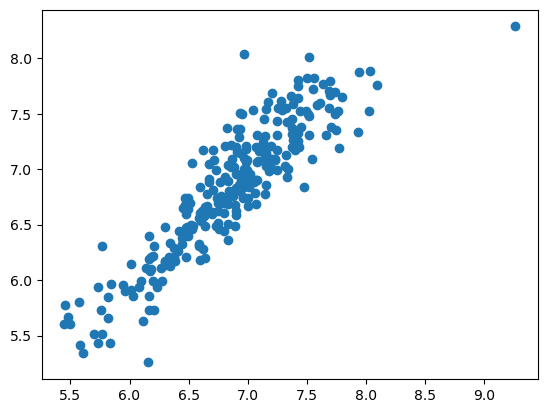

In [160]:
val = ColumnTransformer(transformers=[('transform', OneHotEncoder(sparse = False, drop ='first'),
                [0, 1, 4, 8, 12])], remainder = 'passthrough')

model = LinearRegression()



pipe = Pipeline([('val',val),('model',model)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

plt.scatter(y_pred, y_test)
#plt.plot(range(0, 5000), range(0,5000), c='red')

linear_regg_value = r2_score(y_test, y_pred)

print(linear_regg_value)

In [161]:
ndf

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics,DisplayArea
0,Apple,Ultrabook,13.3,8,Mac,1.37,1339.69,0,1,Intel Core i5,128,0,0,Intel,4096000
1,Apple,Ultrabook,13.3,8,Mac,1.34,898.94,0,0,Intel Core i5,0,0,128,Intel,1296000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,0,0,Intel Core i5,256,0,0,Intel,2073600
3,Apple,Ultrabook,15.4,16,Mac,1.83,2537.45,0,1,Intel Core i7,512,0,0,AMD,5184000
4,Apple,Ultrabook,13.3,8,Mac,1.37,1803.60,0,1,Intel Core i5,256,0,0,Intel,4096000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,638.00,1,1,Intel Core i7,128,0,0,Intel,2073600
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,1499.00,1,1,Intel Core i7,512,0,0,Intel,5760000
1300,Lenovo,Notebook,14.0,2,Windows,1.50,229.00,0,0,Intel Celeron Dual,0,0,64,Intel,1049088
1301,HP,Notebook,15.6,6,Windows,2.19,764.00,0,0,Intel Core i7,0,1000,0,AMD,1049088


# Random Forest

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.876893637225252
Mean Absolute Error:  0.15717462755723377
0.876893637225252


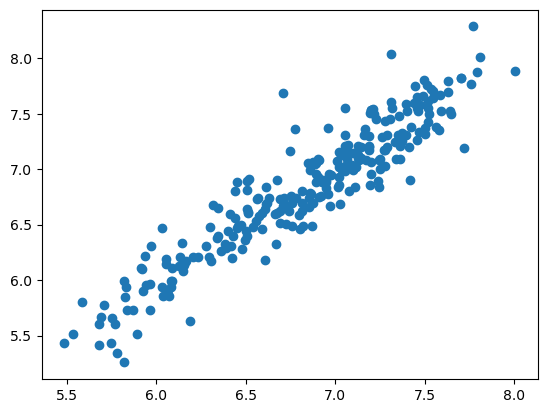

In [169]:
val = ColumnTransformer(transformers=[('transform', OneHotEncoder(sparse = False, drop ='first'),
                [0, 1, 4, 8, 12])], remainder = 'passthrough')

model = RandomForestRegressor(n_estimators = 150, random_state = 3,
                    max_samples = 0.6, max_features = 0.7, max_depth =30)

#Modyfying this function attributes will give us proper R2 score

pipe = Pipeline([('val',val),('model',model)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

plt.scatter(y_pred, y_test)
#plt.plot(range(0, 5000), range(0,5000), c='red')

random_forest_value = r2_score(y_test, y_pred)
print(random_forest_value)

## Random Forest Model gives us the best approximation with good R2 score

### Additionally we can merge them together with Voting Regressor

# Voting Regressor

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.8824979342821873
Mean Absolute Error:  0.15705983396387932
0.8824979342821873


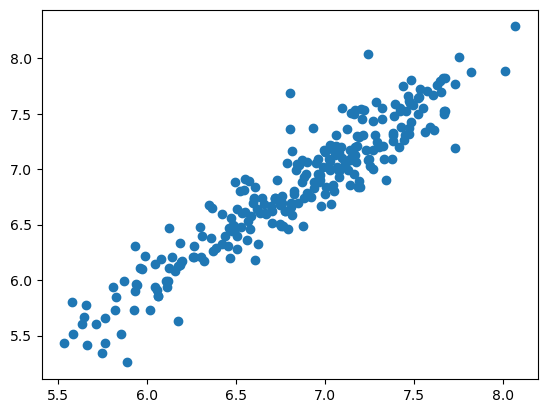

In [163]:
from sklearn.ensemble import VotingRegressor


val = ColumnTransformer(transformers=[('transform', OneHotEncoder(sparse = False, drop ='first'),
                [0, 1, 4, 8, 12])], remainder = 'passthrough')

# Loading Models

random_forest = RandomForestRegressor(n_estimators = 150, random_state = 3,
                    max_samples = 0.6, max_features = 0.7, max_depth =30)

linear_regg = LinearRegression()



model = VotingRegressor([('random', random_forest),
                         ('linear', linear_regg)], weights=[4,1])



pipe = Pipeline([('val',val),('model',model)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))


plt.scatter(y_pred, y_test)
#plt.plot(range(0, 5000), range(0,5000), c='red')

voting_regg_value = r2_score(y_test, y_pred)
print(voting_regg_value)

# **Model Comparison**

```
# This is formatted as code
```



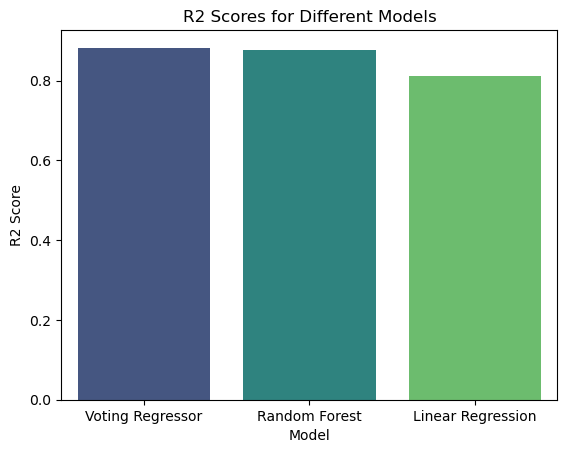

In [164]:
data = {'Model': ['Voting Regressor', 'Random Forest', 'Linear Regression'],
        'R2 Score': [voting_regg_value, random_forest_value, linear_regg_value]}

val = pd.DataFrame(data)


sns.barplot(x='Model', y='R2 Score', data=val, palette='viridis')
plt.title('R2 Scores for Different Models')
plt.show()



# Exporting Model for applying it behind Web App



In [170]:
import pickle

pickle.dump(ndf, open('ndf.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [166]:
print('Columns in ndf: ', ndf.columns)

Columns in ndf:  Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Price_euros', 'Touchscreen', 'IPS', 'Processor', 'SSD', 'HDD',
       'FlashStorage', 'Graphics', 'DisplayArea'],
      dtype='object')


In [167]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1302 non-null   object 
 1   TypeName      1302 non-null   object 
 2   Inches        1302 non-null   float64
 3   Ram           1302 non-null   int32  
 4   OpSys         1302 non-null   object 
 5   Weight        1302 non-null   float64
 6   Price_euros   1302 non-null   float64
 7   Touchscreen   1302 non-null   int64  
 8   IPS           1302 non-null   int64  
 9   Processor     1302 non-null   object 
 10  SSD           1302 non-null   int64  
 11  HDD           1302 non-null   int64  
 12  FlashStorage  1302 non-null   int64  
 13  Graphics      1302 non-null   object 
 14  DisplayArea   1302 non-null   int32  
dtypes: float64(3), int32(2), int64(5), object(5)
memory usage: 152.6+ KB


In [168]:
ndf

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,Processor,SSD,HDD,FlashStorage,Graphics,DisplayArea
0,Apple,Ultrabook,13.3,8,Mac,1.37,1339.69,0,1,Intel Core i5,128,0,0,Intel,4096000
1,Apple,Ultrabook,13.3,8,Mac,1.34,898.94,0,0,Intel Core i5,0,0,128,Intel,1296000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,0,0,Intel Core i5,256,0,0,Intel,2073600
3,Apple,Ultrabook,15.4,16,Mac,1.83,2537.45,0,1,Intel Core i7,512,0,0,AMD,5184000
4,Apple,Ultrabook,13.3,8,Mac,1.37,1803.60,0,1,Intel Core i5,256,0,0,Intel,4096000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,638.00,1,1,Intel Core i7,128,0,0,Intel,2073600
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,1499.00,1,1,Intel Core i7,512,0,0,Intel,5760000
1300,Lenovo,Notebook,14.0,2,Windows,1.50,229.00,0,0,Intel Celeron Dual,0,0,64,Intel,1049088
1301,HP,Notebook,15.6,6,Windows,2.19,764.00,0,0,Intel Core i7,0,1000,0,AMD,1049088
